In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from helper import set_seeds, create_folder_if_it_doesnt_exist, get_x_test,  calculate_test_results
from plot_helper import get_folder_name_from_args, plot_results_during_training,\
        display_syn_results_over_datasets, display_results_over_datasets,\
        display_final_results, synthetic_display_final_results

%load_ext autoreload

%autoreload 2


# Orthogonal QR: Display results

## Display During Training Results 

### Run `python run_all_synthetic_data_experiments.py` in the folder `reproducible_experiments` to receive all during traning results of the synthetic data
### Alternatively, run main.py with the flag: `--save_training_results 1` to save the results of the training process


In [2]:
REAL_DATA = 'real data'
SYN_DATA = 'synthetic data'

data_type = SYN_DATA
data_name = '3'

results_dir = f'results/during_training/{data_type.replace(" ", "_")}/{data_name}/'

result_during_training_name = (results_dir + "results_during_training").replace(" ", "_")
results_during_training = pickle.load(open(result_during_training_name, "rb"))

print(f"Possible args to choose from: {list(results_during_training.keys())}")

Possible args to choose from: ['loss=batch_qr_bs=1024_corr_mult=0.0_hsic_mult=0.0', 'loss=batch_qr_bs=1024_corr_mult=0.5_hsic_mult=0.0']


In [3]:
args_name = 'loss=batch_qr_bs=1024_corr_mult=0.0_hsic_mult=0.0'
print(f"Possible seed values to choose from: {list(results_during_training[args_name].keys())}")

Possible seed values to choose from: [42]


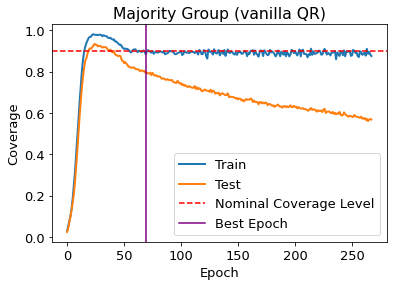

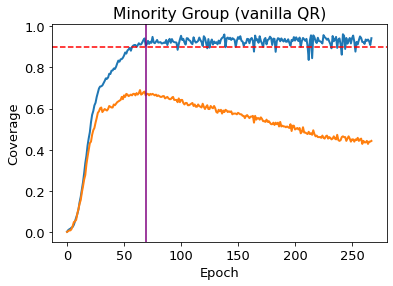

In [4]:
seed_value = 42
curr_results_during_training = results_during_training[args_name][seed_value]

alpha = 0.1
mpl.rc('font', **{'size'   : 13})

line_width = 2
save_dir = f'./results/figures/syn/during_training/seed={seed_value}'
create_folder_if_it_doesnt_exist(save_dir)

if 'corr_mult=0.0' in args_name:
    majority_title = "Majority Group (vanilla QR)"
    minority_title = "Minority Group (vanilla QR)"
    last_epoch_to_present = len(curr_results_during_training['coverage_over_train_group_0']) - 1
else:
    majority_title = "Majority Group (orthogonal QR)"
    minority_title = "Minority Group (orthogonal QR)"
    last_epoch_to_present = len(curr_results_during_training['coverage_over_train_group_0']) -1 # - 200 + 10


desired_accuracy = 1-alpha

plt.plot(curr_results_during_training['coverage_over_train_group_0'][:last_epoch_to_present], label="Train", linewidth=line_width)
plt.plot(curr_results_during_training['coverage_over_test_group_0'][:last_epoch_to_present], label="Test", linewidth=line_width)
plt.axhline(y=desired_accuracy, color='r', linestyle='--',  label="Nominal Coverage Level")
plt.axvline(len(curr_results_during_training['coverage_over_train_group_0']) - 200, color='purple',  linestyle='-', label="Best Epoch")

plt.legend(loc="lower right")


plt.title(majority_title)
plt.xlabel("Epoch")
plt.ylabel("Coverage")
plt.savefig(f'{save_dir}/{majority_title}.png', dpi=300)
plt.show()

plt.plot(curr_results_during_training['coverage_over_train_group_1'][:last_epoch_to_present], label="Train", linewidth=line_width)
plt.plot(curr_results_during_training['coverage_over_test_group_1'][:last_epoch_to_present], label="Test", linewidth=line_width)
plt.axhline(y=desired_accuracy, color='r', linestyle='--', label="Nominal Coverage Level")
plt.axvline(len(curr_results_during_training['coverage_over_train_group_1']) - 200, color='purple',  linestyle='-', label="Best Epoch")


plt.title(minority_title)
plt.xlabel("Epoch")
plt.ylabel("Coverage")
plt.savefig(f'{save_dir}/{minority_title}.png', dpi=300)
plt.show()



In [5]:
print('majority train coverage: {:.2f}, majority test coverage: {:.2f}'.
      format(curr_results_during_training['coverage_over_train_group_0'][-201]*100,
      curr_results_during_training['coverage_over_test_group_0'][-201]*100))

print('majority train avg length: {:.2f}, majority test avg length: {:.2f}'.
      format(curr_results_during_training['interval_lengths_over_train_group_0'][-201],
      curr_results_during_training['interval_lengths_over_test_group_0'][-201]))
print()

print('minority train: {:.2f}, minority test: {:.2f}'.
      format(curr_results_during_training['coverage_over_train_group_1'][-201]*100,
      curr_results_during_training['coverage_over_test_group_1'][-201]*100))


print('minority train avg length: {:.2f}, minority test avg length: {:.2f}'.
      format(curr_results_during_training['interval_lengths_over_train_group_1'][-201],
      curr_results_during_training['interval_lengths_over_test_group_1'][-201]))

majority train coverage: 89.84, majority test coverage: 80.34
majority train avg length: 1.53, majority test avg length: 1.55

minority train: 94.12, minority test: 68.27
minority train avg length: 6.42, minority test avg length: 6.45


# Synthetic Data Results - averaged over 30 seeds

### Run `python run_all_synthetic_data_experiments.py` in the folder `reproducible_experiments` to receive all results of the synthetic data

## Pinball loss

In [6]:
"""
possible loss_method = ['qr,' 'int']

"""
display_syn_results_over_datasets(['3', '10'], loss_method='qr', 
                                 corr_multipliers=[0., 0.5], hsic_multipliers=[])

,qr+corr0.0_λ=3,qr+corr0.5_λ=3
Coverage,0.769,0.863
Interval length average,2.573,3.149
Pearson's correlation average,0.105,0.038
log(HSIC) average,-2.971,-3.335
WSC average,0.769,0.861
Delta WSC average,0.022,0.025
Group 0 coverage average,0.796,0.872
Group 0 interval length average,1.588,1.617
Group 1 coverage average,0.663,0.825
Group 1 interval length average,6.447,9.177


,qr+corr0.0_λ=10,qr+corr0.5_λ=10
Coverage,0.786,0.863
Interval length average,5.966,7.470
Pearson's correlation average,0.115,0.032
log(HSIC) average,-3.036,-3.246
WSC average,0.791,0.858
Delta WSC average,0.032,0.027
Group 0 coverage average,0.811,0.870
Group 0 interval length average,1.878,1.714
Group 1 coverage average,0.687,0.837
Group 1 interval length average,22.046,30.113


Mean values and standard errors:


Coverage                       Length               Pearson's corr  \
               QR            OQR            QR           OQR             QR   
3   76.938 (.246)  86.281 (.244)  2.573 (.014)  3.149 (.021)    .105 (.005)   
10  78.572 (.249)  86.310 (.245)  5.966 (.051)  7.470 (.059)    .115 (.006)   

                        HSIC                  Delta WSC                
            OQR           QR          OQR            QR           OQR  
3   .038 (.008)  .001 (1e-4)  1e-3 (1e-4)  2.195 (.337)  2.500 (.373)  
10  .032 (.006)  1e-3 (1e-4)  1e-3 (1e-3)  3.240 (.384)  2.658 (.335)

In [7]:
styled_final_df = synthetic_display_final_results('qr', 'Vanilla QR', 'Orthogonal QR (corr)')

## Interval score loss

In [8]:
display_syn_results_over_datasets(['3', '10'], loss_method='int', 
                                 corr_multipliers=[0., 3.], hsic_multipliers=[])
styled_final_df = synthetic_display_final_results('int', 'Vanilla QR', 'Orthogonal QR (corr)')

,int+corr0.0_λ=3,int+corr3.0_λ=3
Coverage,0.820,0.865
Interval length average,2.895,3.271
Pearson's correlation average,0.094,0.061
log(HSIC) average,-3.153,-3.418
WSC average,0.819,0.857
Delta WSC average,0.031,0.015
Group 0 coverage average,0.844,0.886
Group 0 interval length average,1.731,1.889
Group 1 coverage average,0.728,0.784
Group 1 interval length average,7.462,8.698


,int+corr0.0_λ=10,int+corr3.0_λ=10
Coverage,0.836,0.879
Interval length average,6.833,7.906
Pearson's correlation average,0.124,0.089
log(HSIC) average,-3.121,-3.309
WSC average,0.848,0.871
Delta WSC average,0.032,0.026
Group 0 coverage average,0.860,0.899
Group 0 interval length average,2.218,2.530
Group 1 coverage average,0.741,0.800
Group 1 interval length average,24.989,29.071


Mean values and standard errors:


Coverage                       Length               Pearson's corr  \
               QR            OQR            QR           OQR             QR   
3   82.042 (.460)  86.500 (.549)  2.895 (.025)  3.271 (.055)    .094 (.008)   
10  83.582 (.389)  87.886 (.367)  6.833 (.060)  7.906 (.111)    .124 (.009)   

                        HSIC                  Delta WSC                
            OQR           QR          OQR            QR           OQR  
3   .061 (.008)  1e-3 (1e-3)  1e-3 (1e-4)  3.062 (.322)  1.537 (.339)  
10  .089 (.014)  1e-3 (1e-4)  1e-3 (1e-3)  3.196 (.369)  2.633 (.359)

# Real Dataset Results - averaged over 30 seeds
### Run `python run_all_real_data_experiments.py` in the folder `reproducible_experiments` to receive all results of the real data

In [9]:
possible_dataset_names = ['facebook_1', 'facebook_2','blog_data', 'bio',\
                 'kin8nm', 'naval','meps_19', 'meps_20', 'meps_21']

## Pinball loss

qr+corr0.5_face1


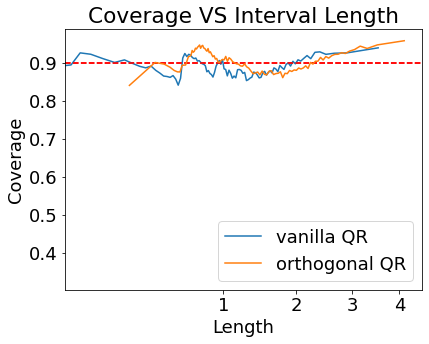

,qr+corr0.0_face1,qr+corr0.5_face1
Coverage,.881,.905
Interval length average,1.092,1.441
Pearson's correlation average,.057,.011
log(HSIC) average,-4.117,-4.231
WSC average,.817,.862
Delta WSC average,.064,.042
Delta ILS-Coverage,.093,.032
Delta Node-Coverage,.036,.019


qr+corr0.5_face2


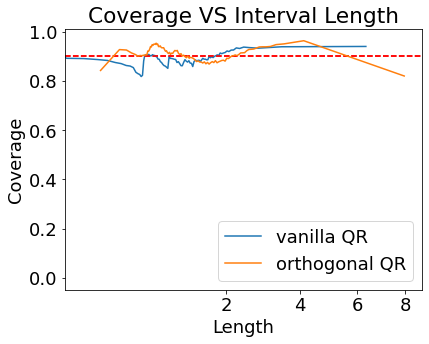

,qr+corr0.0_face2,qr+corr0.5_face2
Coverage,.874,.911
Interval length average,1.067,1.408
Pearson's correlation average,.099,.009
log(HSIC) average,-3.884,-4.136
WSC average,.806,.866
Delta WSC average,.068,.045
Delta ILS-Coverage,.101,.035
Delta Node-Coverage,.047,.021


qr+corr0.5_blog


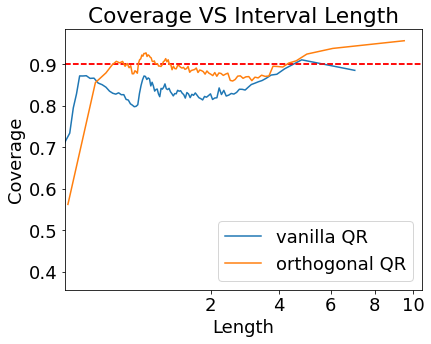

,qr+corr0.0_blog,qr+corr0.5_blog
Coverage,.829,.889
Interval length average,1.361,1.635
Pearson's correlation average,.043,.010
log(HSIC) average,-4.108,-4.189
WSC average,.729,.810
Delta WSC average,.100,.079
Delta ILS-Coverage,.128,.013
Delta Node-Coverage,.048,.032


qr+corr0.1_bio


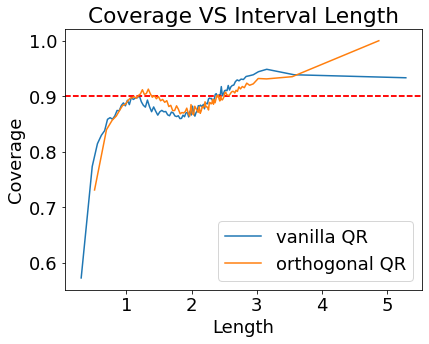

,qr+corr0.0_bio,qr+corr0.1_bio
Coverage,.884,.891
Interval length average,1.883,2.027
Pearson's correlation average,.084,.039
log(HSIC) average,-3.895,-4.500
WSC average,.877,.873
Delta WSC average,.012,.018
Delta ILS-Coverage,.085,.048
Delta Node-Coverage,.009,.008


qr+corr0.1_kin8


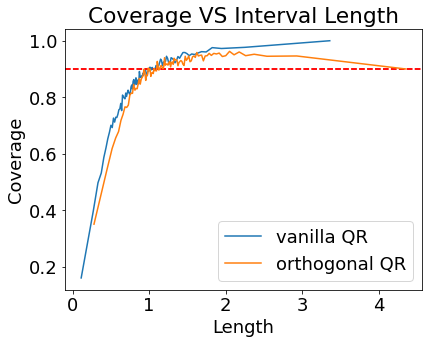

,qr+corr0.0_kin8,qr+corr0.1_kin8
Coverage,.846,.886
Interval length average,.978,1.278
Pearson's correlation average,.283,.205
log(HSIC) average,-2.714,-3.016
WSC average,.843,.889
Delta WSC average,.016,.014
Delta ILS-Coverage,.168,.071
Delta Node-Coverage,.015,.017


qr+corr0.1_nava


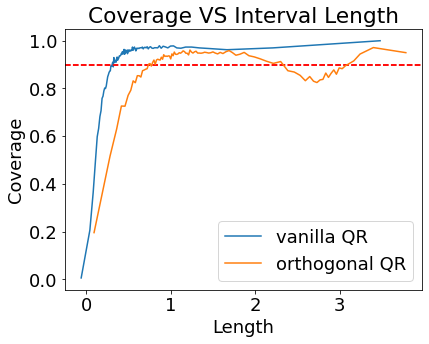

,qr+corr0.0_nava,qr+corr0.1_nava
Coverage,.899,.895
Interval length average,.555,1.490
Pearson's correlation average,.269,.067
log(HSIC) average,-2.934,-3.137
WSC average,.872,.851
Delta WSC average,.028,.044
Delta ILS-Coverage,.087,.024
Delta Node-Coverage,.024,.028


qr+corr0.5_mep19


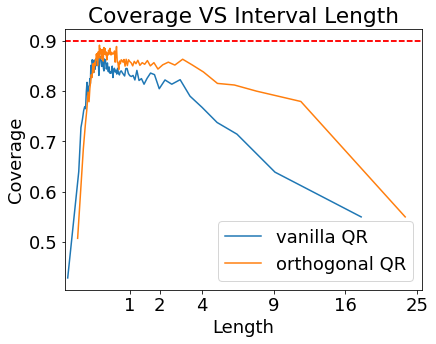

,qr+corr0.0_mep19,qr+corr0.5_mep19
Coverage,.824,.852
Interval length average,.842,1.004
Pearson's correlation average,.056,.026
log(HSIC) average,-4.023,-4.228
WSC average,.739,.804
Delta WSC average,.086,.049
Delta ILS-Coverage,.130,.015
Delta Node-Coverage,.072,.039


qr+corr0.5_mep20


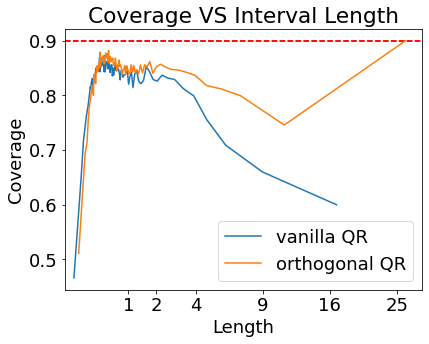

,qr+corr0.0_mep20,qr+corr0.5_mep20
Coverage,.828,.843
Interval length average,.864,1.027
Pearson's correlation average,.048,.027
log(HSIC) average,-4.076,-4.209
WSC average,.755,.789
Delta WSC average,.073,.055
Delta ILS-Coverage,.114,.017
Delta Node-Coverage,.053,.028


qr+corr0.5_mep21


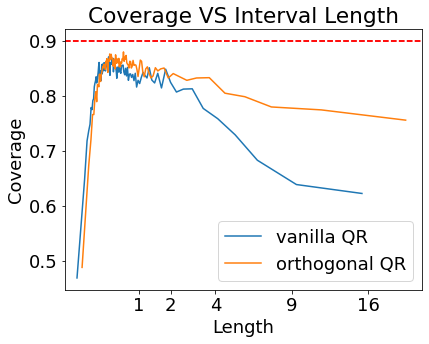

,qr+corr0.0_mep21,qr+corr0.5_mep21
Coverage,.825,.841
Interval length average,.859,.994
Pearson's correlation average,.064,.027
log(HSIC) average,-3.973,-4.092
WSC average,.738,.772
Delta WSC average,.087,.069
Delta ILS-Coverage,.129,.019
Delta Node-Coverage,.060,.037


Mean values and standard errors:


Coverage                       Length                \
                        QR            OQR            QR           OQR   
facebook_1   88.100 (.713)  90.482 (.241)  1.092 (.008)  1.441 (.010)   
facebook_2  87.382 (2.441)  91.126 (.221)  1.067 (.004)  1.408 (.010)   
blog_data    82.888 (.454)  88.924 (.455)  1.361 (.015)  1.635 (.015)   
bio          88.420 (.115)  89.076 (.158)  1.883 (.007)  2.027 (.009)   
kin8nm       84.629 (.178)  88.622 (.181)   .978 (.007)  1.278 (.010)   
naval        89.890 (.234)  89.502 (.220)   .555 (.013)  1.490 (.028)   
meps_19      82.443 (.304)  85.163 (.572)   .842 (.013)  1.004 (.013)   
meps_20      82.807 (.349)  84.271 (.518)   .864 (.020)  1.027 (.016)   
meps_21      82.497 (.326)  84.073 (.643)   .859 (.022)   .994 (.019)   

           Pearson's corr                      HSIC               \
                       QR          OQR           QR          OQR   
facebook_1    .057 (.013)  .011 (.002)  1e-3 (1e-3)  1e-4 (1e-5)   
facebook_2    .099 (.028)  .009 (.002)  .002 (.001)  1e-4 (1e-5)   
blog_data     .043 (.002)  .010 (.002)  1e-4 (1e-4)  1e-4 (1e-4)   
bio           .084 (.002)  .039 (.002)  1e-3 (1e-4)  1e-4 (1e-5)   
kin8nm        .283 (.003)  .205 (.006)  .002 (1e-4)  .001 (1e-4)   
naval         .269 (.006)  .067 (.006)  .001 (1e-4)  1e-3 (1e-4)   
meps_19       .056 (.006)  .026 (.004)  1e-3 (1e-5)  1e-4 (1e-4)   
meps_20       .048 (.005)  .027 (.005)  1e-4 (1e-5)  1e-4 (1e-4)   
meps_21       .064 (.006)  .027 (.004)  1e-3 (1e-4)  1e-3 (1e-4)   

                Delta WSC               Delta ILS-Coverage                \
                       QR           OQR                 QR           OQR   
facebook_1   6.371 (.731)  4.242 (.399)       9.345 (.520)  3.195 (.185)   
facebook_2  6.810 (1.239)  4.504 (.314)      10.104 (.986)  3.465 (.117)   
blog_data   10.037 (.330)  7.885 (.306)      12.773 (.261)  1.285 (.178)   
bio          1.218 (.192)  1.762 (.248)       8.461 (.263)  4.806 (.167)   
kin8nm       1.638 (.216)  1.393 (.205)      16.770 (.452)  7.148 (.283)   
naval        2.824 (.394)  4.449 (.563)       8.674 (.633)  2.398 (.278)   
meps_19      8.580 (.644)  4.866 (.496)      12.976 (.551)  1.550 (.204)   
meps_20      7.269 (.697)  5.520 (.590)      11.351 (.459)  1.735 (.270)   
meps_21      8.745 (.687)  6.927 (.738)      12.940 (.507)  1.938 (.236)   

           Delta Node-Coverage                
                            QR           OQR  
facebook_1        3.555 (.491)  1.874 (.238)  
facebook_2       4.654 (1.433)  2.065 (.284)  
blog_data         4.823 (.386)  3.163 (.322)  
bio                .912 (.153)   .846 (.116)  
kin8nm            1.471 (.256)  1.713 (.347)  
naval             2.410 (.312)  2.756 (.427)  
meps_19          7.204 (1.066)  3.931 (.584)  
meps_20           5.328 (.850)  2.830 (.494)  
meps_21           6.043 (.911)  3.730 (.569)

In [11]:
"""
possible dataset_names = ['facebook_1', 'facebook_2','blog_data', 'bio',\
                 'kin8nm', 'naval','meps_19', 'meps_20', 'meps_21']
   
possible loss_method = ['qr,' 'int']

"""

dataset_names = ['facebook_1', 'facebook_2','blog_data', 'bio',\
                 'kin8nm', 'naval','meps_19', 'meps_20', 'meps_21']

display_results_over_datasets(dataset_names, loss_method='qr',
                              corr_mults=[0.,0.1, 0.5], hsic_mults=[], 
                              seeds=range(0,30),desired_coverage=0.9)

In [12]:
styled_final_df = display_final_results('qr', baseline_method='Vanilla QR', improved_method='Orthogonal QR (corr)')

## Interval score loss

int+corr0.5_face1


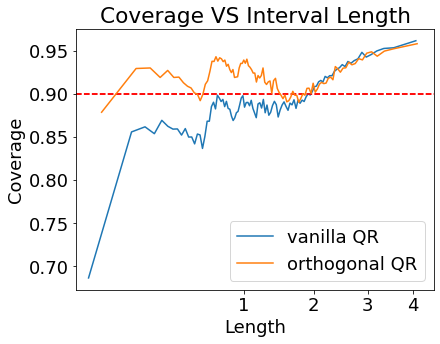

,int+corr0.0_face1,int+corr0.5_face1
Coverage,.890,.920
Interval length average,1.425,1.450
Pearson's correlation average,.075,.016
log(HSIC) average,-4.103,-4.518
WSC average,.859,.892
Delta WSC average,.034,.029
Delta ILS-Coverage,.072,.023
Delta Node-Coverage,.012,.012


int+corr0.5_face2


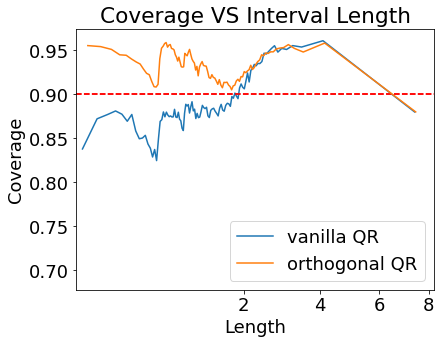

,int+corr0.0_face2,int+corr0.5_face2
Coverage,.888,.934
Interval length average,1.351,1.381
Pearson's correlation average,.083,.007
log(HSIC) average,-4.071,-4.636
WSC average,.847,.905
Delta WSC average,.042,.029
Delta ILS-Coverage,.067,.021
Delta Node-Coverage,.021,.019


int+corr1.0_blog


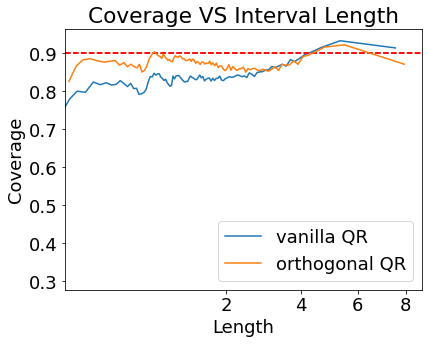

,int+corr0.0_blog,int+corr1.0_blog
Coverage,.829,.873
Interval length average,1.580,1.653
Pearson's correlation average,.081,.011
log(HSIC) average,-3.810,-4.193
WSC average,.725,.771
Delta WSC average,.105,.102
Delta ILS-Coverage,.106,.011
Delta Node-Coverage,.049,.040


int+corr0.1_bio


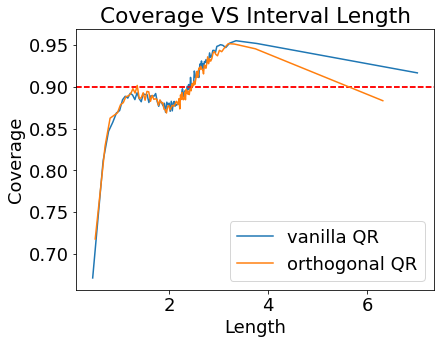

,int+corr0.0_bio,int+corr0.1_bio
Coverage,.899,.898
Interval length average,2.194,2.186
Pearson's correlation average,.089,.069
log(HSIC) average,-3.874,-4.089
WSC average,.883,.880
Delta WSC average,.018,.019
Delta ILS-Coverage,.079,.040
Delta Node-Coverage,.008,.009


int+corr0.5_kin8


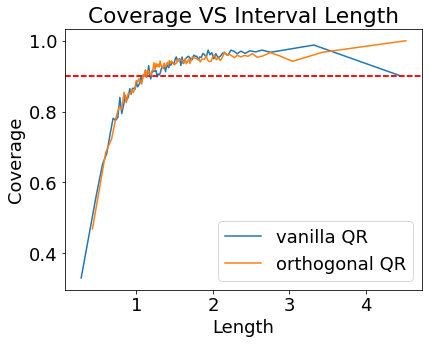

,int+corr0.0_kin8,int+corr0.5_kin8
Coverage,.905,.918
Interval length average,1.491,1.586
Pearson's correlation average,.250,.178
log(HSIC) average,-2.917,-3.231
WSC average,.892,.913
Delta WSC average,.017,.015
Delta ILS-Coverage,.142,.038
Delta Node-Coverage,.018,.014


int+corr0.1_nava


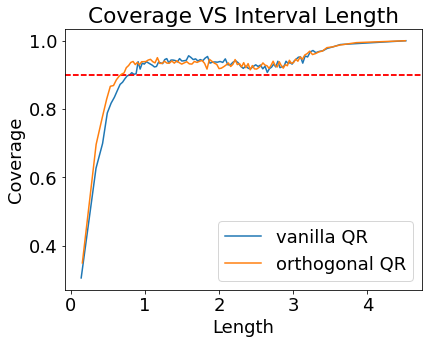

,int+corr0.0_nava,int+corr0.1_nava
Coverage,.919,.924
Interval length average,1.955,1.976
Pearson's correlation average,.157,.135
log(HSIC) average,-3.228,-3.389
WSC average,.878,.892
Delta WSC average,.042,.033
Delta ILS-Coverage,.095,.039
Delta Node-Coverage,.015,.011


int+corr3.0_mep19


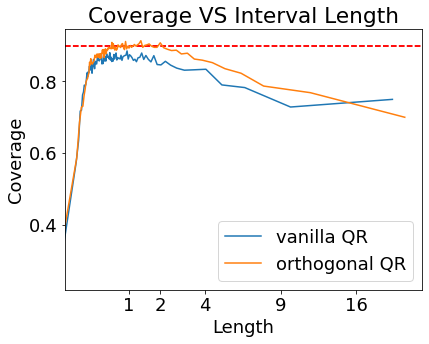

,int+corr0.0_mep19,int+corr3.0_mep19
Coverage,.837,.862
Interval length average,.946,1.133
Pearson's correlation average,.040,.033
log(HSIC) average,-3.917,-3.995
WSC average,.728,.780
Delta WSC average,.109,.082
Delta ILS-Coverage,.111,.020
Delta Node-Coverage,.067,.048


int+corr3.0_mep20


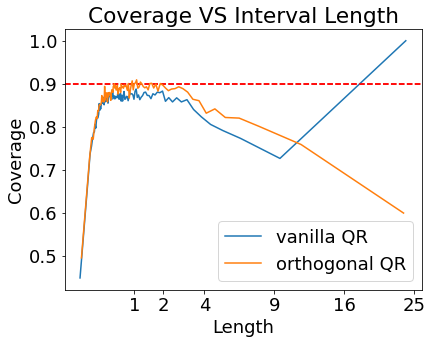

,int+corr0.0_mep20,int+corr3.0_mep20
Coverage,.849,.868
Interval length average,1.042,1.211
Pearson's correlation average,.028,.031
log(HSIC) average,-3.958,-3.991
WSC average,.770,.790
Delta WSC average,.079,.078
Delta ILS-Coverage,.085,.019
Delta Node-Coverage,.042,.032


int+corr3.0_mep21


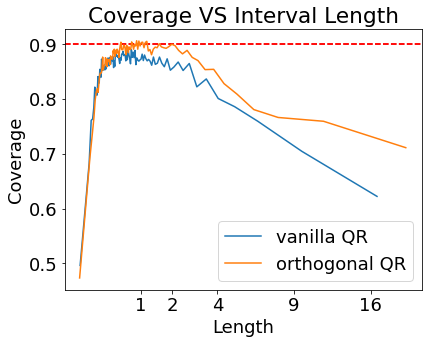

,int+corr0.0_mep21,int+corr3.0_mep21
Coverage,.853,.866
Interval length average,.977,1.141
Pearson's correlation average,.047,.037
log(HSIC) average,-4.051,-3.979
WSC average,.760,.789
Delta WSC average,.093,.077
Delta ILS-Coverage,.097,.022
Delta Node-Coverage,.058,.051


Mean values and standard errors:


Coverage                        Length                \
                        QR             OQR            QR           OQR   
facebook_1  89.033 (1.637)   91.971 (.192)  1.425 (.021)  1.450 (.017)   
facebook_2  88.820 (2.399)   93.355 (.190)  1.351 (.012)  1.381 (.013)   
blog_data   82.939 (2.658)   87.251 (.493)  1.580 (.016)  1.653 (.013)   
bio          89.931 (.198)   89.759 (.255)  2.194 (.039)  2.186 (.039)   
kin8nm       90.506 (.158)   91.808 (.152)  1.491 (.049)  1.586 (.041)   
naval        91.945 (.230)   92.365 (.211)  1.955 (.097)  1.976 (.102)   
meps_19     83.677 (1.027)  86.156 (1.321)   .946 (.031)  1.133 (.039)   
meps_20      84.862 (.351)   86.807 (.539)  1.042 (.016)  1.211 (.025)   
meps_21      85.272 (.406)   86.627 (.646)   .977 (.022)  1.141 (.026)   

           Pearson's corr                      HSIC               \
                       QR          OQR           QR          OQR   
facebook_1    .075 (.020)  .016 (.003)  .001 (.001)  1e-4 (1e-5)   
facebook_2    .083 (.028)  .007 (.002)  .002 (.002)  1e-4 (1e-5)   
blog_data     .081 (.026)  .011 (.002)  .001 (1e-3)  1e-4 (1e-5)   
bio           .089 (.004)  .069 (.004)  1e-3 (1e-4)  1e-3 (1e-4)   
kin8nm        .250 (.004)  .178 (.006)  .001 (1e-4)  1e-3 (1e-4)   
naval         .157 (.003)  .135 (.005)  1e-3 (1e-4)  1e-3 (1e-4)   
meps_19       .040 (.010)  .033 (.005)  1e-3 (1e-4)  1e-3 (1e-4)   
meps_20       .028 (.005)  .031 (.005)  1e-3 (1e-4)  1e-3 (1e-4)   
meps_21       .047 (.004)  .037 (.004)  1e-3 (1e-4)  1e-3 (1e-4)   

                 Delta WSC                Delta ILS-Coverage                \
                        QR            OQR                 QR           OQR   
facebook_1   3.392 (1.079)   2.853 (.405)       7.230 (.661)  2.264 (.190)   
facebook_2   4.161 (1.483)   2.891 (.227)       6.707 (.660)  2.063 (.131)   
blog_data    10.468 (.450)  10.176 (.656)      10.610 (.338)  1.097 (.180)   
bio           1.761 (.167)   1.917 (.204)       7.853 (.684)  4.040 (.290)   
kin8nm        1.740 (.234)   1.502 (.231)      14.186 (.823)  3.785 (.276)   
naval         4.189 (.601)   3.337 (.560)       9.506 (.937)  3.883 (.378)   
meps_19     10.867 (1.001)  8.228 (1.018)     11.066 (1.220)  1.960 (.288)   
meps_20       7.898 (.430)   7.790 (.634)       8.513 (.476)  1.902 (.222)   
meps_21       9.295 (.668)   7.702 (.789)       9.743 (.459)  2.154 (.258)   

           Delta Node-Coverage                
                            QR           OQR  
facebook_1        1.189 (.190)  1.175 (.168)  
facebook_2        2.065 (.708)  1.945 (.330)  
blog_data         4.875 (.657)  3.966 (.670)  
bio                .796 (.154)   .917 (.137)  
kin8nm            1.775 (.286)  1.371 (.212)  
naval             1.450 (.233)  1.069 (.166)  
meps_19           6.720 (.917)  4.841 (.659)  
meps_20           4.234 (.763)  3.189 (.565)  
meps_21          5.771 (1.112)  5.143 (.820)

In [13]:
dataset_names = possible_dataset_names

display_results_over_datasets(dataset_names, loss_method='int',
                              corr_mults=[0., 0.1, 0.5, 1., 3.], hsic_mults=[], 
                              seeds=range(0,30),desired_coverage=0.9)
styled_final_df = display_final_results('int', baseline_method='Vanilla QR', improved_method='Orthogonal QR (corr)')

## Pinball loss and HSIC
### Vanilla QR vs Orthogonal QR (with pinball loss and HSIC)

qr+hsic0.5_face1


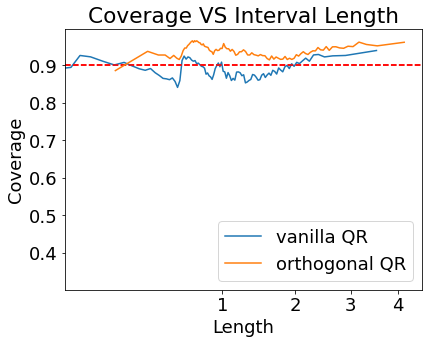

,qr+hsic0.0_face1,qr+hsic0.5_face1
Coverage,.881,.939
Interval length average,1.092,1.432
Pearson's correlation average,.057,.015
log(HSIC) average,-4.117,-4.629
WSC average,.817,.896
Delta WSC average,.064,.043
Delta ILS-Coverage,.096,.022
Delta Node-Coverage,.033,.020


qr+hsic0.5_face2


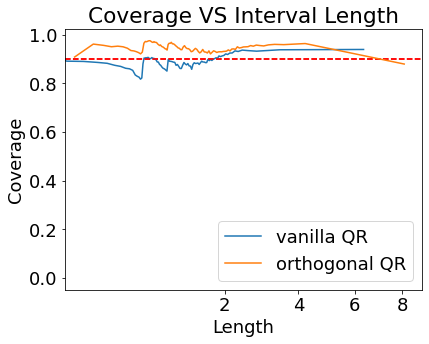

,qr+hsic0.0_face2,qr+hsic0.5_face2
Coverage,.874,.948
Interval length average,1.067,1.370
Pearson's correlation average,.099,.011
log(HSIC) average,-3.884,-4.682
WSC average,.806,.909
Delta WSC average,.068,.039
Delta ILS-Coverage,.111,.019
Delta Node-Coverage,.058,.025


qr+hsic0.5_blog


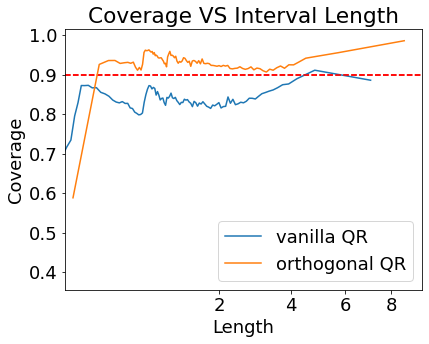

,qr+hsic0.0_blog,qr+hsic0.5_blog
Coverage,.829,.929
Interval length average,1.361,1.645
Pearson's correlation average,.043,.016
log(HSIC) average,-4.108,-4.358
WSC average,.729,.861
Delta WSC average,.100,.068
Delta ILS-Coverage,.135,.014
Delta Node-Coverage,.049,.028


qr+hsic0.1_bio


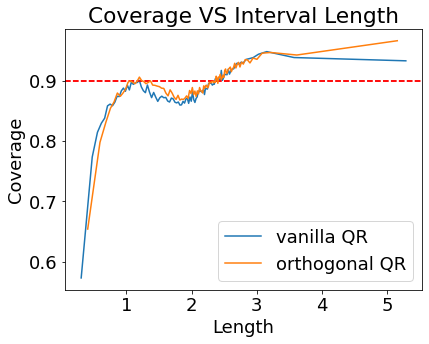

,qr+hsic0.0_bio,qr+hsic0.1_bio
Coverage,.884,.895
Interval length average,1.883,2.027
Pearson's correlation average,.084,.075
log(HSIC) average,-3.895,-3.959
WSC average,.877,.878
Delta WSC average,.012,.017
Delta ILS-Coverage,.085,.048
Delta Node-Coverage,.008,.010


qr+hsic0.1_kin8


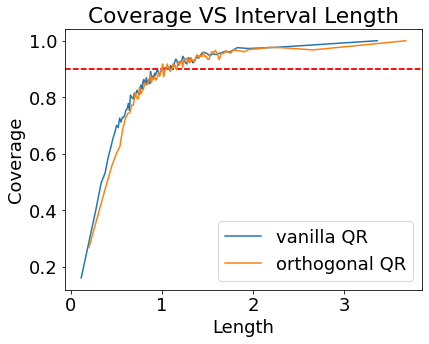

,qr+hsic0.0_kin8,qr+hsic0.1_kin8
Coverage,.846,.882
Interval length average,.978,1.196
Pearson's correlation average,.283,.257
log(HSIC) average,-2.714,-2.845
WSC average,.843,.869
Delta WSC average,.016,.023
Delta ILS-Coverage,.178,.084
Delta Node-Coverage,.018,.013


qr+hsic0.1_nava


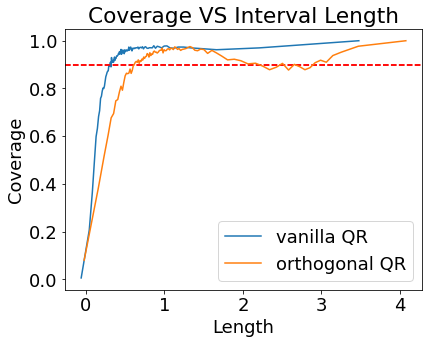

,qr+hsic0.0_nava,qr+hsic0.1_nava
Coverage,.899,.897
Interval length average,.555,1.212
Pearson's correlation average,.269,.135
log(HSIC) average,-2.934,-2.960
WSC average,.872,.856
Delta WSC average,.028,.043
Delta ILS-Coverage,.065,.025
Delta Node-Coverage,.024,.022


qr+hsic0.1_mep19


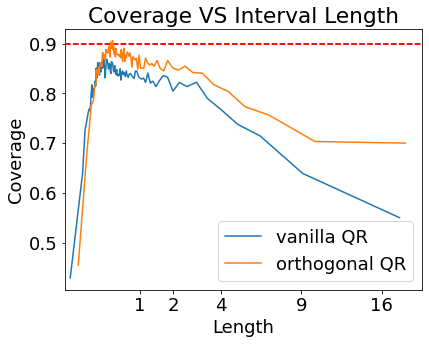

,qr+hsic0.0_mep19,qr+hsic0.1_mep19
Coverage,.824,.855
Interval length average,.842,.940
Pearson's correlation average,.056,.051
log(HSIC) average,-4.023,-4.002
WSC average,.739,.779
Delta WSC average,.086,.075
Delta ILS-Coverage,.119,.026
Delta Node-Coverage,.067,.054


qr+hsic0.1_mep20


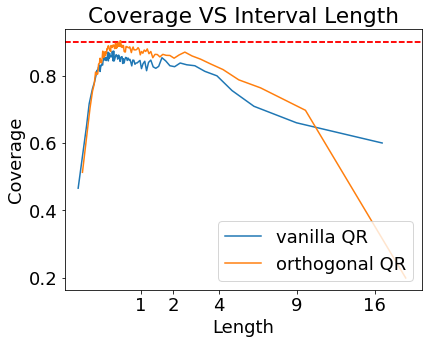

,qr+hsic0.0_mep20,qr+hsic0.1_mep20
Coverage,.828,.860
Interval length average,.864,.959
Pearson's correlation average,.048,.057
log(HSIC) average,-4.076,-3.973
WSC average,.755,.789
Delta WSC average,.073,.071
Delta ILS-Coverage,.111,.021
Delta Node-Coverage,.050,.042


qr+hsic0.5_mep21


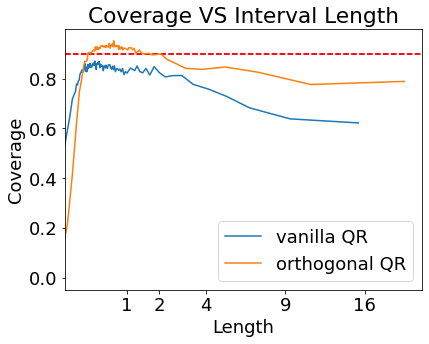

,qr+hsic0.0_mep21,qr+hsic0.5_mep21
Coverage,.825,.825
Interval length average,.859,.941
Pearson's correlation average,.064,.077
log(HSIC) average,-3.973,-4.052
WSC average,.738,.745
Delta WSC average,.087,.080
Delta ILS-Coverage,.123,.019
Delta Node-Coverage,.039,.029


Mean values and standard errors:


Coverage                        Length                \
                        QR             OQR            QR           OQR   
facebook_1   88.100 (.713)   93.856 (.192)  1.092 (.008)  1.432 (.011)   
facebook_2  87.382 (2.441)   94.775 (.119)  1.067 (.004)  1.370 (.009)   
blog_data    82.888 (.454)   92.878 (.117)  1.361 (.015)  1.645 (.011)   
bio          88.420 (.115)   89.471 (.134)  1.883 (.007)  2.027 (.007)   
kin8nm       84.629 (.178)   88.219 (.197)   .978 (.007)  1.196 (.010)   
naval        89.890 (.234)   89.720 (.213)   .555 (.013)  1.212 (.018)   
meps_19      82.443 (.304)   85.467 (.302)   .842 (.013)   .940 (.012)   
meps_20      82.807 (.349)   86.015 (.457)   .864 (.020)   .959 (.019)   
meps_21      82.497 (.326)  82.507 (4.624)   .859 (.022)   .941 (.058)   

           Pearson's corr                      HSIC               \
                       QR          OQR           QR          OQR   
facebook_1    .057 (.013)  .015 (.003)  1e-3 (1e-3)  1e-4 (1e-5)   
facebook_2    .099 (.028)  .011 (.002)  .002 (.001)  1e-4 (1e-5)   
blog_data     .043 (.002)  .016 (.004)  1e-4 (1e-4)  1e-4 (1e-5)   
bio           .084 (.002)  .075 (.002)  1e-3 (1e-4)  1e-3 (1e-4)   
kin8nm        .283 (.003)  .257 (.004)  .002 (1e-4)  .001 (1e-4)   
naval         .269 (.006)  .135 (.006)  .001 (1e-4)  .001 (1e-4)   
meps_19       .056 (.006)  .051 (.006)  1e-3 (1e-5)  1e-3 (1e-4)   
meps_20       .048 (.005)  .057 (.008)  1e-4 (1e-5)  1e-3 (1e-4)   
meps_21       .064 (.006)  .077 (.014)  1e-3 (1e-4)  1e-3 (1e-4)   

                Delta WSC               Delta ILS-Coverage                \
                       QR           OQR                 QR           OQR   
facebook_1   6.371 (.731)  4.284 (.357)       9.620 (.521)  2.226 (.141)   
facebook_2  6.810 (1.239)  3.904 (.247)     11.088 (1.170)  1.910 (.103)   
blog_data   10.037 (.330)  6.768 (.270)      13.524 (.286)  1.399 (.102)   
bio          1.218 (.192)  1.733 (.239)       8.530 (.210)  4.797 (.107)   
kin8nm       1.638 (.216)  2.341 (.326)      17.769 (.500)  8.396 (.189)   
naval        2.824 (.394)  4.266 (.513)       6.480 (.640)  2.464 (.273)   
meps_19      8.580 (.644)  7.528 (.632)      11.940 (.299)  2.563 (.273)   
meps_20      7.269 (.697)  7.082 (.655)      11.128 (.468)  2.111 (.274)   
meps_21      8.745 (.687)  8.045 (.754)      12.333 (.507)  1.920 (.283)   

           Delta Node-Coverage                
                            QR           OQR  
facebook_1        3.300 (.552)  2.041 (.346)  
facebook_2       5.849 (1.887)  2.501 (.355)  
blog_data         4.851 (.467)  2.826 (.403)  
bio                .772 (.130)   .971 (.162)  
kin8nm            1.813 (.327)  1.317 (.212)  
naval             2.374 (.380)  2.172 (.327)  
meps_19          6.736 (1.050)  5.446 (.854)  
meps_20           4.979 (.916)  4.245 (.800)  
meps_21           3.899 (.673)  2.947 (.528)

In [14]:
dataset_names =possible_dataset_names

display_results_over_datasets(dataset_names, loss_method='qr',
                              corr_mults=[], hsic_mults=[0., 0.1, 0.5], 
                              seeds=range(0,30),desired_coverage=0.9)

styled_final_df = display_final_results('qr', baseline_method='Vanilla QR', improved_method='Orthogonal QR (HSIC)')

###  Orthogonal QR (with pinball loss and HSIC) vs  Orthogonal QR (with pinball loss and decorrelation)

qr+corr0.5_face1


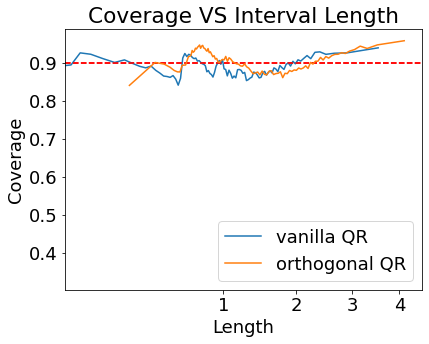

qr+hsic0.5_face1


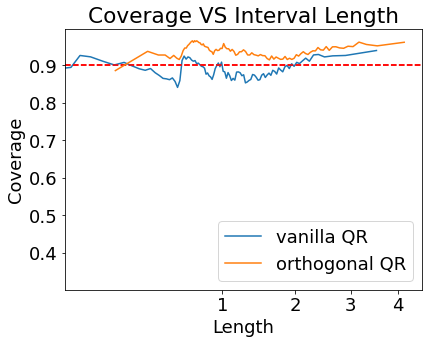

,qr+corr0.0_face1,qr+corr0.5_face1,qr+hsic0.5_face1
Coverage,.881,.905,.939
Interval length average,1.092,1.441,1.432
Pearson's correlation average,.057,.011,.015
log(HSIC) average,-4.117,-4.231,-4.629
WSC average,.817,.862,.896
Delta WSC average,.064,.042,.043


qr+corr0.5_face2


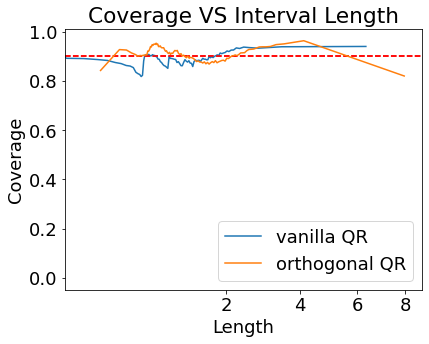

qr+hsic0.5_face2


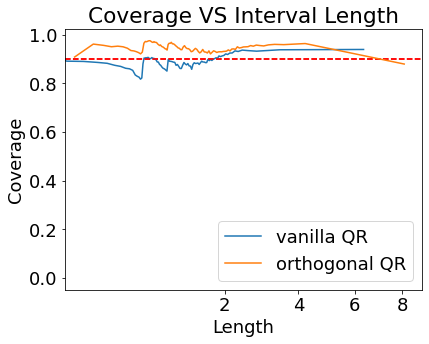

,qr+corr0.0_face2,qr+corr0.5_face2,qr+hsic0.5_face2
Coverage,.874,.911,.948
Interval length average,1.067,1.408,1.370
Pearson's correlation average,.099,.009,.011
log(HSIC) average,-3.884,-4.136,-4.682
WSC average,.806,.866,.909
Delta WSC average,.068,.045,.039


qr+corr0.5_blog


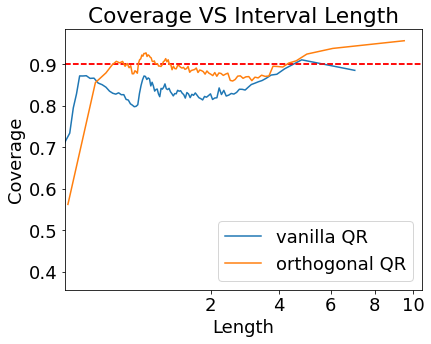

qr+hsic0.5_blog


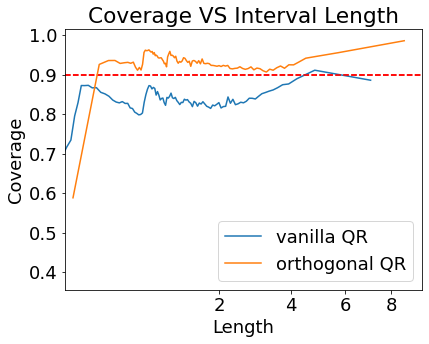

,qr+corr0.0_blog,qr+corr0.5_blog,qr+hsic0.5_blog
Coverage,.829,.889,.929
Interval length average,1.361,1.635,1.645
Pearson's correlation average,.043,.010,.016
log(HSIC) average,-4.108,-4.189,-4.358
WSC average,.729,.810,.861
Delta WSC average,.100,.079,.068


qr+corr0.1_bio


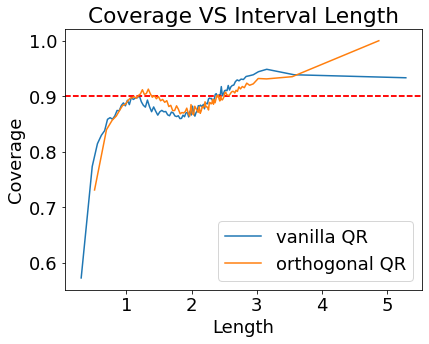

qr+hsic0.1_bio


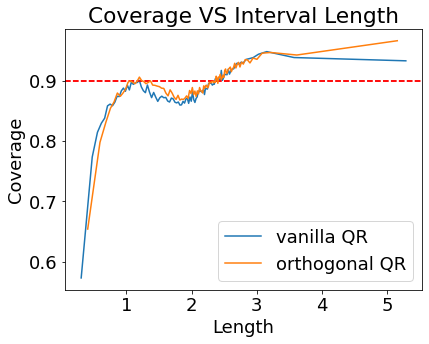

,qr+corr0.0_bio,qr+corr0.1_bio,qr+hsic0.1_bio
Coverage,.884,.891,.895
Interval length average,1.883,2.027,2.027
Pearson's correlation average,.084,.039,.075
log(HSIC) average,-3.895,-4.500,-3.959
WSC average,.877,.873,.878
Delta WSC average,.012,.018,.017


qr+corr0.1_kin8


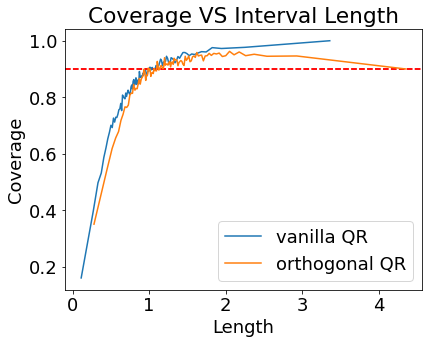

qr+hsic0.1_kin8


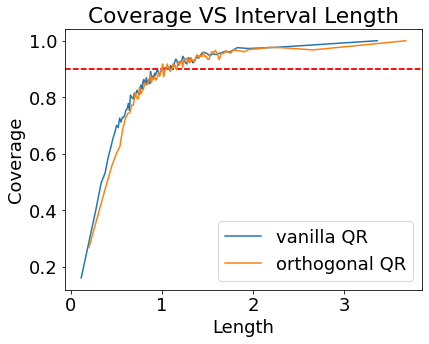

,qr+corr0.0_kin8,qr+corr0.1_kin8,qr+hsic0.1_kin8
Coverage,.846,.886,.882
Interval length average,.978,1.278,1.196
Pearson's correlation average,.283,.205,.257
log(HSIC) average,-2.714,-3.016,-2.845
WSC average,.843,.889,.869
Delta WSC average,.016,.014,.023


qr+corr0.1_nava


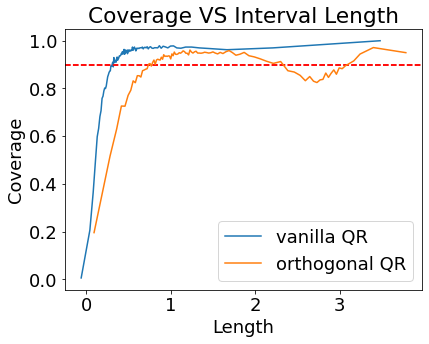

qr+hsic0.1_nava


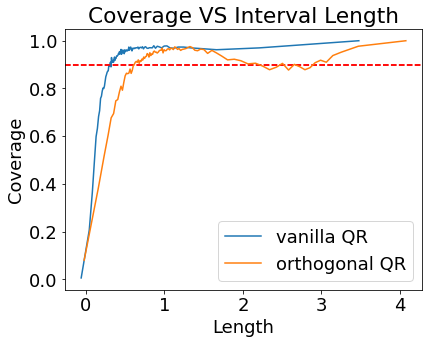

,qr+corr0.0_nava,qr+corr0.1_nava,qr+hsic0.1_nava
Coverage,.899,.895,.897
Interval length average,.555,1.490,1.212
Pearson's correlation average,.269,.067,.135
log(HSIC) average,-2.934,-3.137,-2.960
WSC average,.872,.851,.856
Delta WSC average,.028,.044,.043


qr+corr0.5_mep19


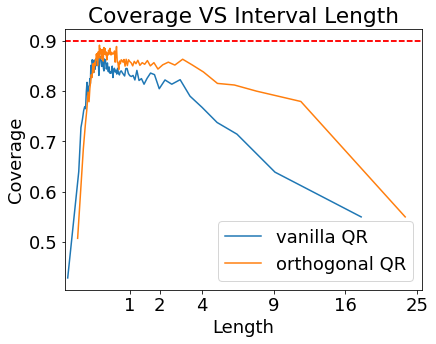

qr+hsic0.1_mep19


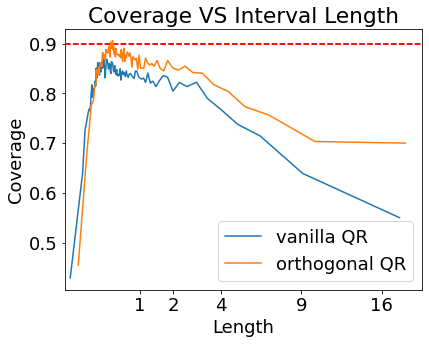

,qr+corr0.0_mep19,qr+corr0.5_mep19,qr+hsic0.1_mep19
Coverage,.824,.852,.855
Interval length average,.842,1.004,.940
Pearson's correlation average,.056,.026,.051
log(HSIC) average,-4.023,-4.228,-4.002
WSC average,.739,.804,.779
Delta WSC average,.086,.049,.075


qr+corr0.5_mep20


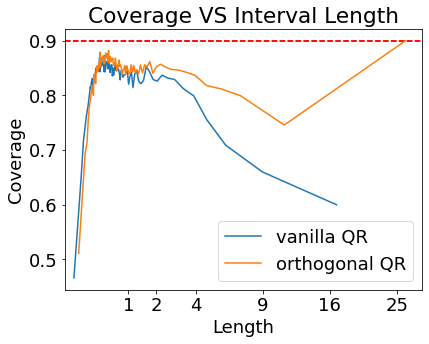

qr+hsic0.1_mep20


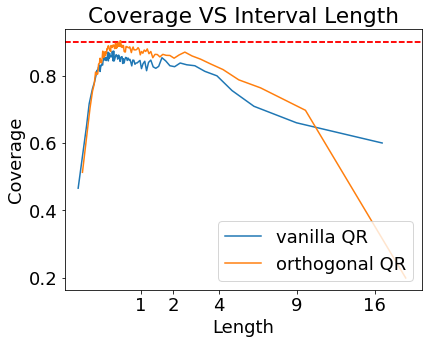

,qr+corr0.0_mep20,qr+corr0.5_mep20,qr+hsic0.1_mep20
Coverage,.828,.843,.860
Interval length average,.864,1.027,.959
Pearson's correlation average,.048,.027,.057
log(HSIC) average,-4.076,-4.209,-3.973
WSC average,.755,.789,.789
Delta WSC average,.073,.055,.071


qr+corr0.5_mep21


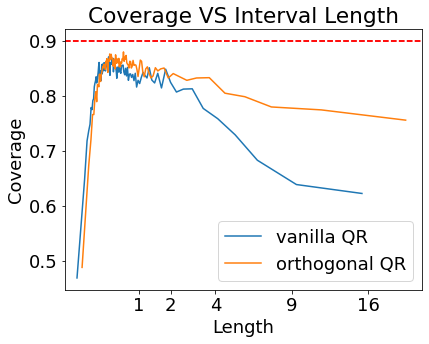

qr+hsic0.5_mep21


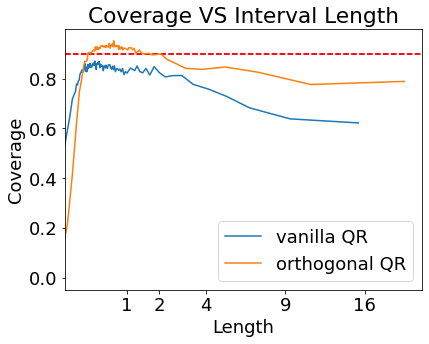

,qr+corr0.0_mep21,qr+corr0.5_mep21,qr+hsic0.5_mep21
Coverage,.825,.841,.825
Interval length average,.859,.994,.941
Pearson's correlation average,.064,.027,.077
log(HSIC) average,-3.973,-4.092,-4.052
WSC average,.738,.772,.745
Delta WSC average,.087,.069,.080


Mean values and standard errors:


Coverage                       Length                \
                        QR            OQR            QR           OQR   
facebook_1   93.856 (.192)  90.482 (.241)  1.432 (.011)  1.441 (.010)   
facebook_2   94.775 (.119)  91.126 (.221)  1.370 (.009)  1.408 (.010)   
blog_data    92.878 (.117)  88.924 (.455)  1.645 (.011)  1.635 (.015)   
bio          89.471 (.134)  89.076 (.158)  2.027 (.007)  2.027 (.009)   
kin8nm       88.219 (.197)  88.622 (.181)  1.196 (.010)  1.278 (.010)   
naval        89.720 (.213)  89.502 (.220)  1.212 (.018)  1.490 (.028)   
meps_19      85.467 (.302)  85.163 (.572)   .940 (.012)  1.004 (.013)   
meps_20      86.015 (.457)  84.271 (.518)   .959 (.019)  1.027 (.016)   
meps_21     82.507 (4.624)  84.073 (.643)   .941 (.058)   .994 (.019)   

           Pearson's corr                      HSIC               \
                       QR          OQR           QR          OQR   
facebook_1    .015 (.003)  .011 (.002)  1e-4 (1e-5)  1e-4 (1e-5)   
facebook_2    .011 (.002)  .009 (.002)  1e-4 (1e-5)  1e-4 (1e-5)   
blog_data     .016 (.004)  .010 (.002)  1e-4 (1e-5)  1e-4 (1e-4)   
bio           .075 (.002)  .039 (.002)  1e-3 (1e-4)  1e-4 (1e-5)   
kin8nm        .257 (.004)  .205 (.006)  .001 (1e-4)  .001 (1e-4)   
naval         .135 (.006)  .067 (.006)  .001 (1e-4)  1e-3 (1e-4)   
meps_19       .051 (.006)  .026 (.004)  1e-3 (1e-4)  1e-4 (1e-4)   
meps_20       .057 (.008)  .027 (.005)  1e-3 (1e-4)  1e-4 (1e-4)   
meps_21       .077 (.014)  .027 (.004)  1e-3 (1e-4)  1e-3 (1e-4)   

               Delta WSC               Delta ILS-Coverage                \
                      QR           OQR                 QR           OQR   
facebook_1  4.284 (.357)  4.242 (.399)       9.345 (.520)  3.195 (.185)   
facebook_2  3.904 (.247)  4.504 (.314)      10.104 (.986)  3.465 (.117)   
blog_data   6.768 (.270)  7.885 (.306)      12.773 (.261)  1.285 (.178)   
bio         1.733 (.239)  1.762 (.248)       8.461 (.263)  4.806 (.167)   
kin8nm      2.341 (.326)  1.393 (.205)      16.770 (.452)  7.148 (.283)   
naval       4.266 (.513)  4.449 (.563)       8.674 (.633)  2.398 (.278)   
meps_19     7.528 (.632)  4.866 (.496)      12.976 (.551)  1.550 (.204)   
meps_20     7.082 (.655)  5.520 (.590)      11.351 (.459)  1.735 (.270)   
meps_21     8.045 (.754)  6.927 (.738)      12.940 (.507)  1.938 (.236)   

           Delta Node-Coverage                
                            QR           OQR  
facebook_1        3.555 (.491)  1.874 (.238)  
facebook_2       4.654 (1.433)  2.065 (.284)  
blog_data         4.823 (.386)  3.163 (.322)  
bio                .912 (.153)   .846 (.116)  
kin8nm            1.471 (.256)  1.713 (.347)  
naval             2.410 (.312)  2.756 (.427)  
meps_19          7.204 (1.066)  3.931 (.584)  
meps_20           5.328 (.850)  2.830 (.494)  
meps_21           6.043 (.911)  3.730 (.569)

In [15]:
dataset_names = possible_dataset_names


display_results_over_datasets(dataset_names, loss_method='qr',
                              corr_mults=[0., 0.1, 0.5], hsic_mults=[0.1, 0.5], 
                              seeds=range(0,30),desired_coverage=0.9)

styled_final_df = display_final_results('qr', baseline_method='Orthogonal QR (HSIC)',
                                        improved_method='Orthogonal QR (corr)')

# Conformalized Quantile Regression (pinball loss)
## Vanilla CQR vs Orthogonal CQR (decorrelation penalty)

qr+corr0.5_face1


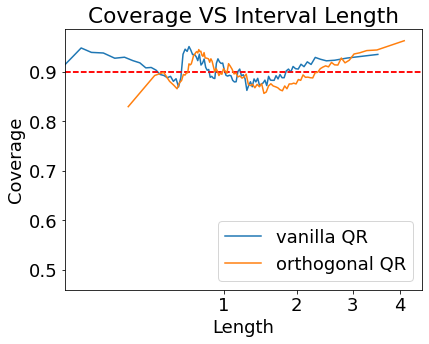

,qr+corr0.0_face1,qr+corr0.5_face1
Coverage,.901,.901
Interval length average,1.092,1.431
Pearson's correlation average,.039,.016
log(HSIC) average,-4.206,-4.222
WSC average,.850,.869
Delta WSC average,.052,.034
Delta ILS-Coverage,.104,.033
Delta Node-Coverage,.029,.021


qr+corr0.5_face2


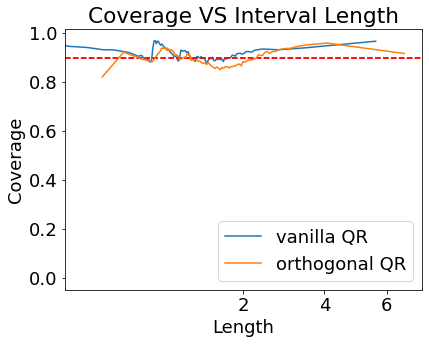

,qr+corr0.0_face2,qr+corr0.5_face2
Coverage,.904,.899
Interval length average,1.068,1.388
Pearson's correlation average,.068,.016
log(HSIC) average,-3.855,-4.131
WSC average,.852,.863
Delta WSC average,.052,.036
Delta ILS-Coverage,.086,.040
Delta Node-Coverage,.035,.017


qr+corr0.5_blog


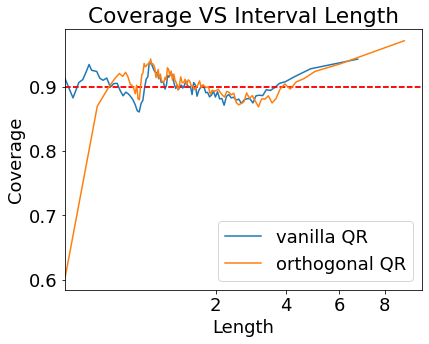

,qr+corr0.0_blog,qr+corr0.5_blog
Coverage,.899,.902
Interval length average,1.413,1.644
Pearson's correlation average,.018,.016
log(HSIC) average,-4.409,-4.171
WSC average,.803,.829
Delta WSC average,.097,.073
Delta ILS-Coverage,.141,.013
Delta Node-Coverage,.062,.038


qr+corr0.1_bio


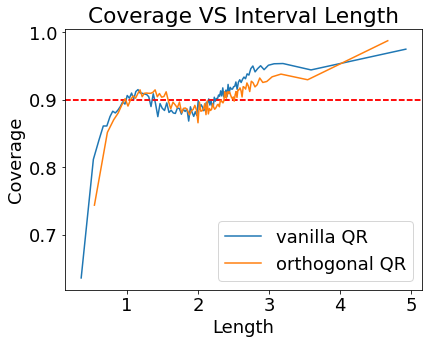

,qr+corr0.0_bio,qr+corr0.1_bio
Coverage,.900,.900
Interval length average,1.929,2.054
Pearson's correlation average,.080,.039
log(HSIC) average,-3.977,-4.583
WSC average,.896,.888
Delta WSC average,.012,.016
Delta ILS-Coverage,.076,.046
Delta Node-Coverage,.008,.011


qr+corr0.1_kin8


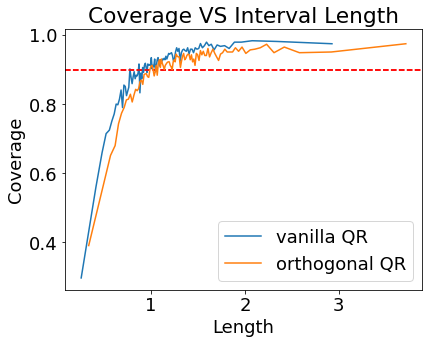

,qr+corr0.0_kin8,qr+corr0.1_kin8
Coverage,.901,.901
Interval length average,1.124,1.332
Pearson's correlation average,.231,.189
log(HSIC) average,-3.063,-3.151
WSC average,.904,.894
Delta WSC average,.017,.029
Delta ILS-Coverage,.144,.060
Delta Node-Coverage,.018,.019


qr+corr0.1_nava


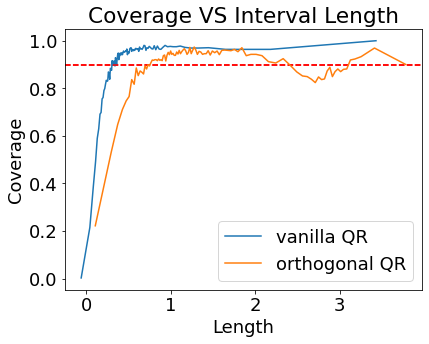

,qr+corr0.0_nava,qr+corr0.1_nava
Coverage,.898,.901
Interval length average,.553,1.507
Pearson's correlation average,.270,.061
log(HSIC) average,-2.925,-3.160
WSC average,.885,.867
Delta WSC average,.023,.041
Delta ILS-Coverage,.087,.028
Delta Node-Coverage,.023,.025


qr+corr0.5_mep19


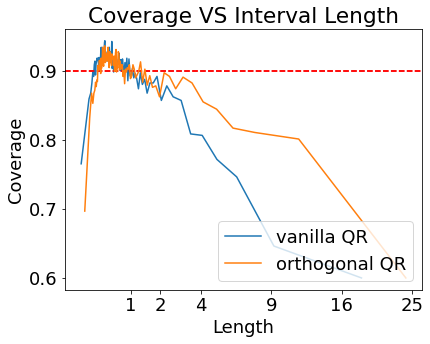

,qr+corr0.0_mep19,qr+corr0.5_mep19
Coverage,.900,.898
Interval length average,.924,1.054
Pearson's correlation average,.122,.060
log(HSIC) average,-3.862,-4.118
WSC average,.780,.856
Delta WSC average,.119,.049
Delta ILS-Coverage,.148,.024
Delta Node-Coverage,.086,.054


qr+corr0.5_mep20


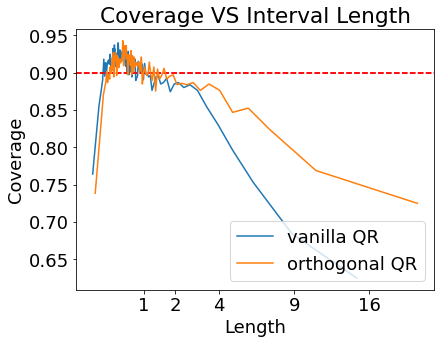

,qr+corr0.0_mep20,qr+corr0.5_mep20
Coverage,.901,.902
Interval length average,.947,1.092
Pearson's correlation average,.104,.059
log(HSIC) average,-4.009,-4.347
WSC average,.804,.853
Delta WSC average,.096,.051
Delta ILS-Coverage,.134,.021
Delta Node-Coverage,.073,.041


qr+corr0.5_mep21


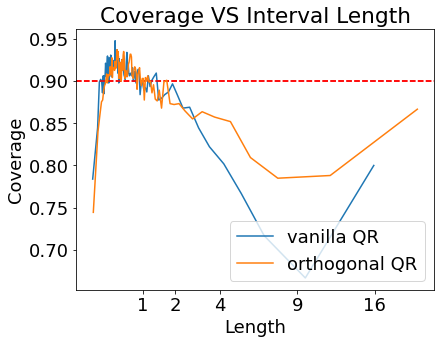

,qr+corr0.0_mep21,qr+corr0.5_mep21
Coverage,.899,.899
Interval length average,.943,1.052
Pearson's correlation average,.118,.069
log(HSIC) average,-3.904,-4.105
WSC average,.796,.830
Delta WSC average,.103,.069
Delta ILS-Coverage,.141,.029
Delta Node-Coverage,.072,.045


Mean values and standard errors:


Coverage                       Length                \
                       QR            OQR            QR           OQR   
facebook_1  90.081 (.092)  90.115 (.073)  1.092 (.008)  1.431 (.007)   
facebook_2  90.395 (.144)  89.944 (.055)  1.068 (.004)  1.388 (.008)   
blog_data   89.928 (.086)  90.154 (.079)  1.413 (.016)  1.644 (.016)   
bio         90.019 (.081)  89.975 (.078)  1.929 (.006)  2.054 (.008)   
kin8nm      90.108 (.175)  90.110 (.205)  1.124 (.007)  1.332 (.011)   
naval       89.841 (.154)  90.063 (.127)   .553 (.011)  1.507 (.030)   
meps_19     89.957 (.130)  89.843 (.121)   .924 (.013)  1.054 (.014)   
meps_20     90.076 (.114)  90.189 (.125)   .947 (.020)  1.092 (.016)   
meps_21     89.934 (.143)  89.895 (.124)   .943 (.021)  1.052 (.017)   

           Pearson's corr                      HSIC               \
                       QR          OQR           QR          OQR   
facebook_1    .039 (.009)  .016 (.003)  1e-3 (1e-4)  1e-4 (1e-5)   
facebook_2    .068 (.011)  .016 (.003)  1e-3 (1e-4)  1e-4 (1e-4)   
blog_data     .018 (.003)  .016 (.003)  1e-4 (1e-5)  1e-4 (1e-4)   
bio           .080 (.002)  .039 (.003)  1e-3 (1e-5)  1e-4 (1e-5)   
kin8nm        .231 (.003)  .189 (.007)  1e-3 (1e-4)  1e-3 (1e-4)   
naval         .270 (.005)  .061 (.007)  .001 (1e-4)  1e-3 (1e-4)   
meps_19       .122 (.007)  .060 (.007)  1e-3 (1e-4)  1e-4 (1e-4)   
meps_20       .104 (.006)  .059 (.007)  1e-3 (1e-4)  1e-4 (1e-4)   
meps_21       .118 (.008)  .069 (.006)  1e-3 (1e-4)  1e-3 (1e-4)   

                Delta WSC               Delta ILS-Coverage                \
                       QR           OQR                 QR           OQR   
facebook_1   5.187 (.408)  3.379 (.410)      10.395 (.376)  3.348 (.168)   
facebook_2   5.175 (.342)  3.648 (.317)       8.625 (.278)  4.026 (.153)   
blog_data    9.658 (.318)  7.303 (.402)      14.131 (.348)  1.332 (.175)   
bio          1.222 (.142)  1.598 (.206)       7.565 (.286)  4.601 (.114)   
kin8nm       1.708 (.265)  2.896 (.375)      14.443 (.509)  6.046 (.327)   
naval        2.338 (.406)  4.142 (.632)       8.718 (.557)  2.769 (.332)   
meps_19     11.942 (.708)  4.915 (.565)      14.824 (.563)  2.406 (.302)   
meps_20      9.638 (.802)  5.060 (.606)      13.447 (.544)  2.134 (.297)   
meps_21     10.310 (.926)  6.860 (.639)      14.119 (.578)  2.899 (.364)   

           Delta Node-Coverage                
                            QR           OQR  
facebook_1        2.945 (.534)  2.078 (.334)  
facebook_2        3.538 (.427)  1.682 (.238)  
blog_data         6.216 (.677)  3.768 (.344)  
bio                .757 (.120)  1.064 (.179)  
kin8nm            1.833 (.322)  1.859 (.218)  
naval             2.280 (.322)  2.512 (.469)  
meps_19          8.570 (1.345)  5.413 (.969)  
meps_20          7.278 (1.430)  4.084 (.754)  
meps_21          7.204 (1.294)  4.515 (.858)

In [16]:
dataset_names = possible_dataset_names


display_results_over_datasets(dataset_names, loss_method='qr',
                              corr_mults=[0.,0.1, 0.5], hsic_mults=[], 
                              seeds=range(0,30),desired_coverage=0.9, calibrated=True)

In [17]:
styled_final_df = display_final_results('cal_qr', baseline_method='Vanilla CQR',
                                        improved_method='Orthogonal CQR (corr)')